/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf
  UserWarning)
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf
  UserWarning)


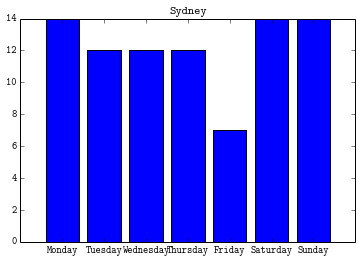

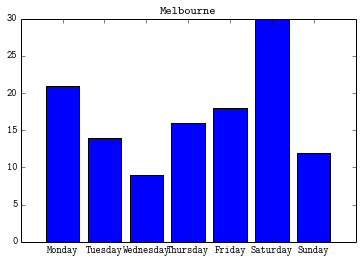

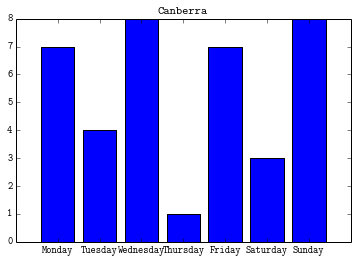

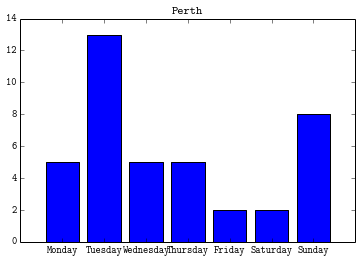

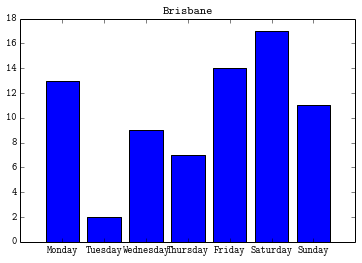

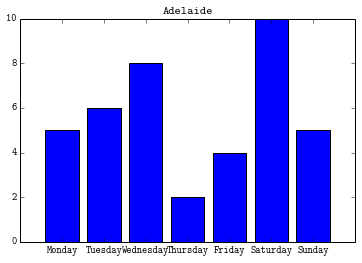

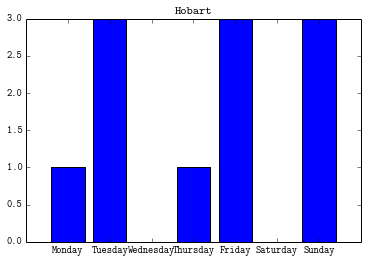

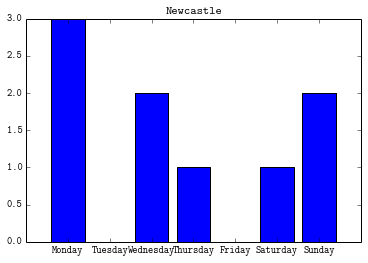

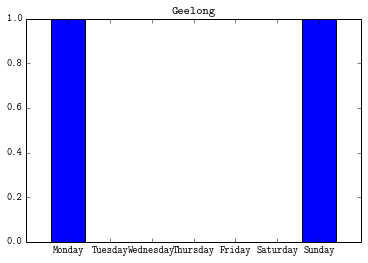

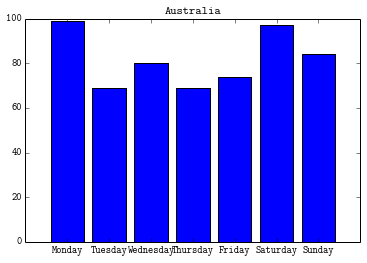

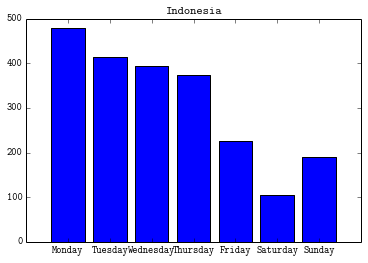

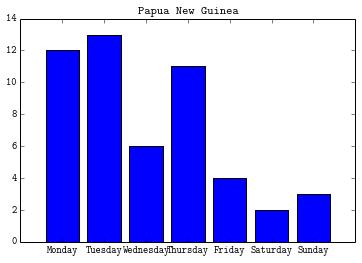

In [2]:
from pyspark.sql import SQLContext
from IPython import display
from collections import OrderedDict
import matplotlib.pyplot as plt

gsrDf = sqlContext.read.load(format = "au.com.d2dcrc.carbon.spark.gsr",\
    startTime = "2015-06-01T00:00:00+00:00",\
    endTime = "2016-06-01T00:00:00+00:00:00")

countByDay = gsrDf.select("key:eventDate").rdd.map(lambda row: row[0].strftime("%A")).countByValue()

def plotit(name, countByDay):
    displayDict = OrderedDict([('Monday', countByDay['Monday']),
                           ('Tuesday', countByDay['Tuesday']),
                           ('Wednesday', countByDay['Wednesday']),
                           ('Thursday', countByDay['Thursday']),
                           ('Friday', countByDay['Friday']),
                           ('Saturday', countByDay['Saturday']),
                           ('Sunday', countByDay['Sunday']),
                          ])
    %matplotlib inline  
    #plt.style.use('seaborn-paper') Apparently we lost this during the upgrade
    plt.title(name)
    plt.bar(range(len(displayDict)), displayDict.values(), align='center')
    plt.xticks(range(len(displayDict)), list(displayDict.keys()))
    plt.show()
    
def showCity(name):
    plotit(name, gsrDf.filter("city=\"" + name + "\"").select("key:eventDate").rdd.map(lambda row: row[0].strftime("%A")).countByValue())

showCity("Sydney")
showCity("Melbourne")
showCity("Canberra")
showCity("Perth")
showCity("Brisbane")
showCity("Adelaide")
showCity("Hobart")
showCity("Newcastle")
showCity("Geelong")

plotit("Australia", gsrDf.filter("country=\"Australia\"").select("key:eventDate").rdd.map(lambda row: row[0].strftime("%A")).countByValue())
plotit("Indonesia", gsrDf.filter("country=\"Indonesia\"").select("key:eventDate").rdd.map(lambda row: row[0].strftime("%A")).countByValue())
plotit("Papua New Guinea", gsrDf.filter("country=\"Papua New Guinea\"").select("key:eventDate").rdd.map(lambda row: row[0].strftime("%A")).countByValue())